# Metoda gradientu prostego

In [76]:
import numpy as np
import matplotlib.pyplot as plt



def gradient_descent(grad, initial_x, alpha=0.8, eps=1e-5, maxiter=1000):
    current_x = initial_x
    previous_step_size = 1
    iteration = 0
    previous_x=0
    solutions=list()
    
    while abs(grad(current_x)) > eps and iteration < maxiter:
        previous_x = current_x
        current_x = current_x - alpha * grad(previous_x)
        previous_step_size = abs(current_x - previous_x)
        iteration = iteration + 1
        solutions.append(current_x)
    return solutions

def fun(x):
    return x**2.0 + x 

def grad(x):
    return 2 * x + 1
    pass

history = gradient_descent(grad, 5)
history_val = fun(np.array(history))
x = np.linspace(-6, 6, 20)
y = fun(x)
plt.plot(x, y)
plt.plot(history, history_val, '-o', c='red')





AttributeError: 'int' object has no attribute 'all'

# zadanie 2 

In [77]:
def secret_function(x):
    return 0.1*(x[0] ** 2) + 0.1*((x[1] - 2) ** 2) + 3*np.sin(0.1 * x[0] * x[1])

<ipython-input-77-d260e07e6007>:2: RuntimeWarning: overflow encountered in double_scalars
  return 0.1*(x[0] ** 2) + 0.1*((x[1] - 2) ** 2) + 3*np.sin(0.1 * x[0] * x[1])
<ipython-input-77-d260e07e6007>:2: RuntimeWarning: invalid value encountered in sin
  return 0.1*(x[0] ** 2) + 0.1*((x[1] - 2) ** 2) + 3*np.sin(0.1 * x[0] * x[1])


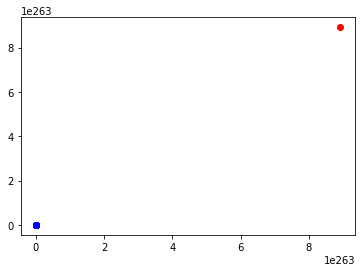

In [79]:
def central_difference(x, dx=0.01):
    f_x = secret_function([x[0] + dx, x[1]])
    f_y = secret_function([x[0], x[1]+dx])
    f_x_y = secret_function(x)
        
    g1 = f_x - f_x_y/(dx)
    g2 = f_y - f_x_y/(dx)
    
    ret = np.array([g1,g1])
    return ret

history = gradient_descent(central_difference,[9,2])
a=[]
b=[]
for number in history:
    a.append(number[0])
    b.append(number[1])

plt.scatter(a,b, color='red')

history = gradient_descent(central_difference, [2,9])
d=[]
e=[]
for number in history:
    d.append(number[0])
    e.append(number[1])


plt.scatter(d,e ,color='blue')
    
    



# zadanie 3

The least-squares regression method is a technique commonly used in Regression Analysis. 
It is a mathematical method used to find the best fit line that represents the relationship 
between an independent and dependent variable. 

In [12]:
data = np.loadtxt("Documents/Optimization-Methods-main/Lab7/data.csv", delimiter=',')

Coefficients
1.2873573700109315 9.90860619032653


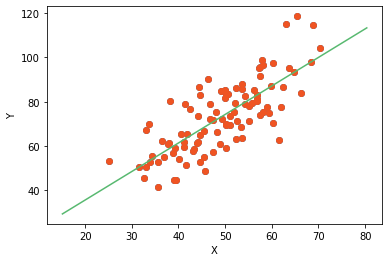

In [32]:
# import the required module 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("Documents/Optimization-Methods-main/Lab7/data.csv")
df.head(10)
#df['32.502345269453031']
plt.scatter(df['32.502345269453031'], df['31.70700584656992'])

X = df['32.502345269453031'].values
Y = df['31.70700584656992'].values

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    number += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = number / denom
    c = mean_y - (m * mean_x)
 
# Printing coefficients
print("Coefficients")
print(m, c)


max_x = np.max(X) + 10
min_x = np.min(X) - 10
 
# Calculating line values x and y
x = np.linspace(min_x, max_x)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423')
 
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [30]:
rmse = 0
for i in range(n):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)


RMSE
10.366794924638429


In [31]:
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)


R2 Score
0.5871609494806324
